In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 80
sns.set()

In [4]:
from synthesizer import Synthesizer
from generator import Generator
from algorithm import Algorithm

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 847/847 [00:07<00:00, 118.93it/s]


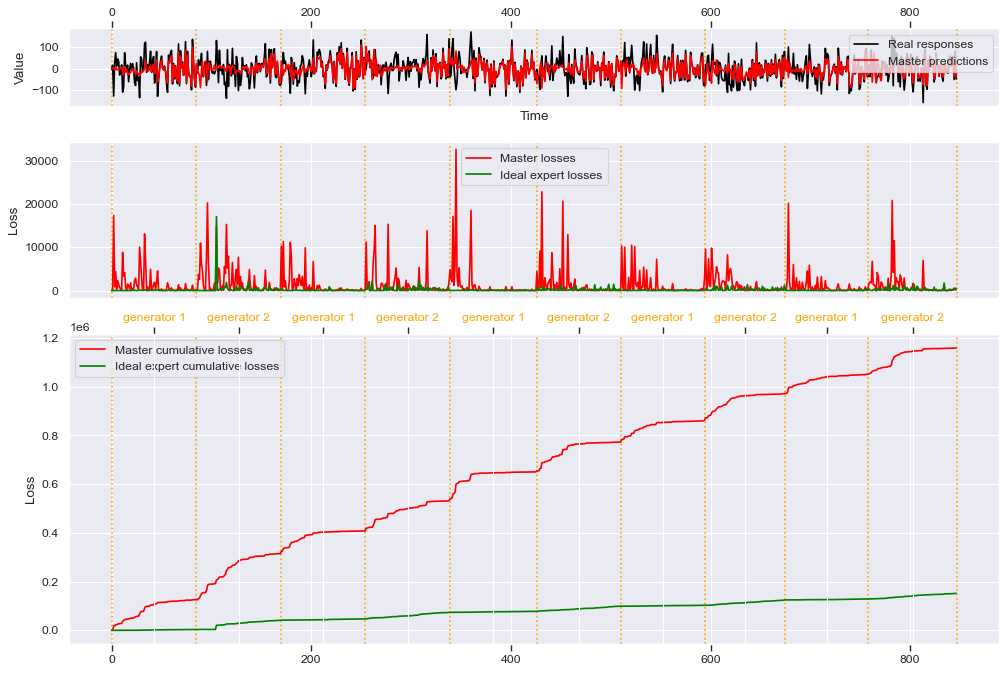

In [18]:
# Cоздание синтезатора, генерирующего workers_num векторов весов размерности dim, для каждого из которых создает по генератору временного ряда.
# Сигнал - случайный вектор из нормального распределения. Отклик - скалярное произведение сигнала на вектор весов плюс нормальный шум из N(0,1)
synt = Synthesizer(dim=20, workers_num=2, random_seed=18)

# Создание генератора данных, склеивающего разнородные временные ряды в один 
# В данном случае источник рядов - наш синтезатор
gen = Generator(synt)


# Получение итогового временного ряда путем получения от синтезатора pieces_num временных рядов 
# произвольного размера из [lower_bound, upper_bound) и их последующей склейки
gen.generate(pieces_num=10, lower_bound=80, upper_bound=90, alternating=True)

# Cоздание объекта GMMP алгоритма, работающего total_time итераций, добавляющего экспертов с периодичностью period
# Каждый эксперт представляет из себя LinReg модель, которая при инициализации тренируется на последних train_window точках
algo = Algorithm(gen, total_time=gen.total_time, period=1, train_window=20, a=-100, b=100)

# Запуск алгоритма
algo.run()

algo.draw_all()